## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv(r'../data/StudentsPerformance.csv')

## How many genders are there

In [3]:
gender = data['Gender'].value_counts()
gender

Gender
Female    518
Male      482
Name: count, dtype: int64

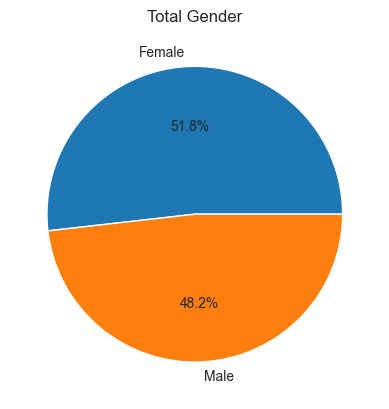

In [4]:
plt.pie(gender, autopct='%1.1f%%', labels=gender.index)
plt.title('Total Gender')
plt.show()

## How many race is there

In [5]:
race = data['Race'].value_counts()
race

Race
Group C    319
Group D    262
Group B    190
Group E    140
Group A     89
Name: count, dtype: int64

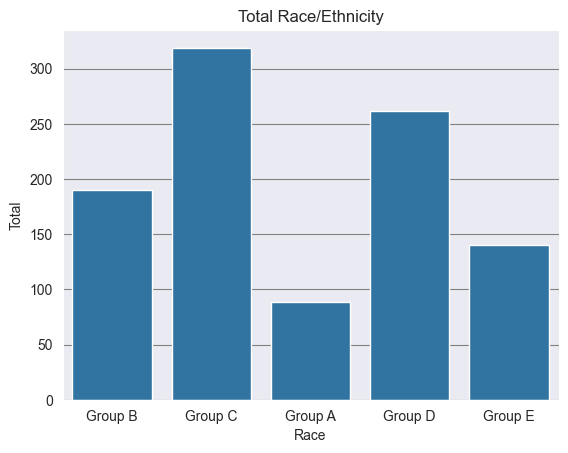

In [6]:
sns.countplot(data=data, x='Race')
plt.title('Total Race/Ethnicity')
plt.xlabel('Race')
plt.ylabel('Total')
plt.grid(True, axis='y', color='grey')
plt.show()

## How many race by gender is there

In [7]:
race_gender = data.groupby('Gender')['Race'].value_counts()
race_gender

Gender  Race   
Female  Group C    180
        Group D    129
        Group B    104
        Group E     69
        Group A     36
Male    Group C    139
        Group D    133
        Group B     86
        Group E     71
        Group A     53
Name: count, dtype: int64

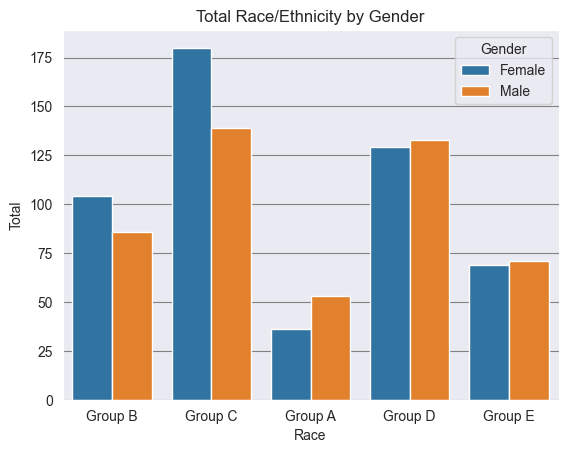

In [8]:
sns.countplot(data=data, hue='Gender', x='Race')
plt.title('Total Race/Ethnicity by Gender')
plt.xlabel('Race')
plt.ylabel('Total')
plt.grid(True, axis='y', color='grey')
plt.show()

## Parental Level of education

In [9]:
edu = data['Parental_Level_of_Education'].value_counts()
edu

Parental_Level_of_Education
High School         375
College             226
Associate Degree    222
Bachelors Degree    118
Masters Degree       59
Name: count, dtype: int64

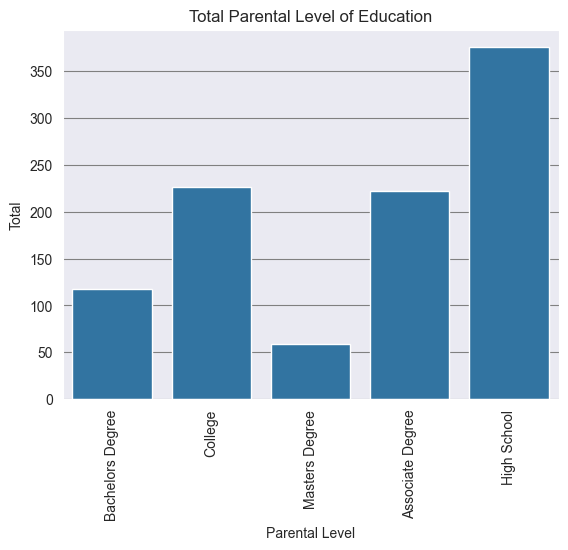

In [10]:
sns.countplot(data=data, x='Parental_Level_of_Education')
plt.title('Total Parental Level of Education')
plt.xlabel('Parental Level')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.grid(True, axis='y', color='grey')
plt.show()

## Parental_Level_of_Education by race

In [11]:
edu_race = data.groupby('Parental_Level_of_Education')['Race'].value_counts().unstack()
edu_race

Race,Group A,Group B,Group C,Group D,Group E
Parental_Level_of_Education,,,,,
Associate Degree,14,41,78,50,39
Bachelors Degree,12,20,40,28,18
College,18,37,69,67,35
High School,42,86,113,94,40
Masters Degree,3,6,19,23,8


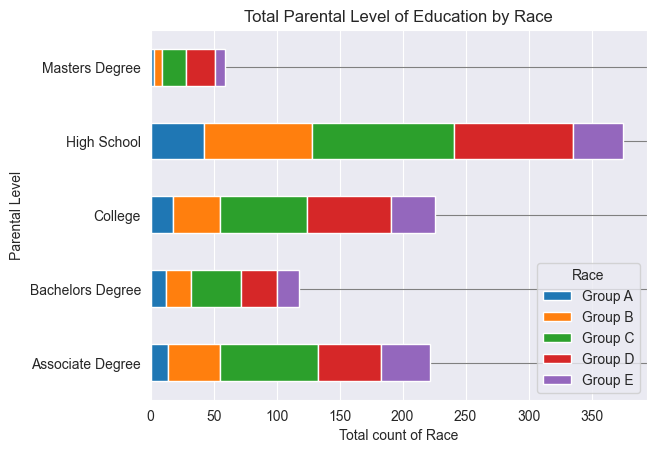

In [12]:
edu_race.plot(kind='barh', stacked =True)
plt.title('Total Parental Level of Education by Race')
plt.xlabel('Total count of Race')
plt.ylabel('Parental Level')
plt.grid(True, axis='y', color='grey')
plt.show()

## Does parents' education affects the child learning

In [13]:
parents = data.groupby('Parental_Level_of_Education')[['Math_Score','Reading_Score','Writing_Score']].mean().round()

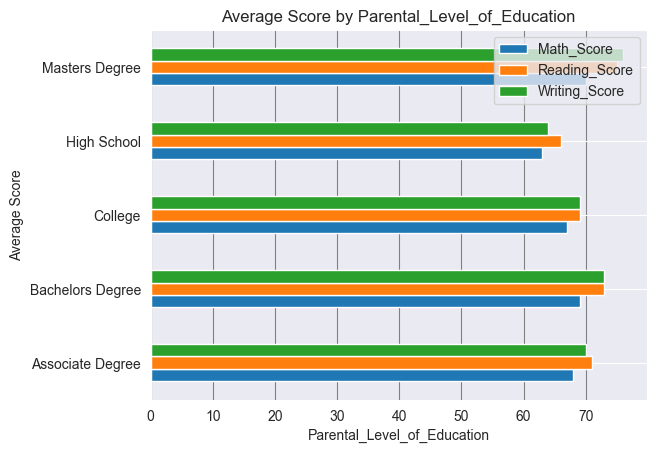

In [14]:
parents.plot(kind='barh')
plt.title('Average Score by Parental_Level_of_Education')
plt.xlabel('Parental_Level_of_Education')
plt.ylabel('Average Score')
plt.grid(True, axis='x', color='grey')
plt.show()

## Heatmap of scores

In [15]:
num = data[['Math_Score','Reading_Score','Writing_Score']]
num_cor = num.corr()

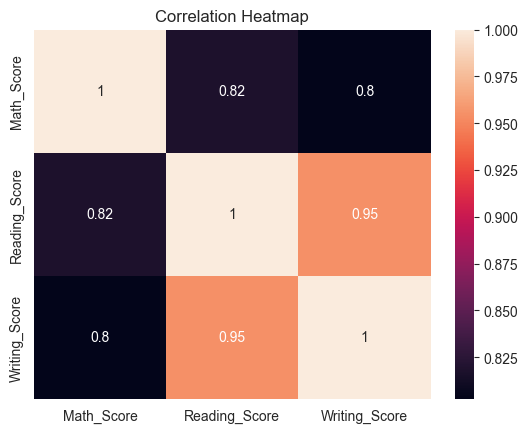

In [16]:
sns.heatmap(num_cor, annot=True)
plt.title('Correlation Heatmap')
plt.show()

## How many of them have Lunch

In [17]:
lunch = data['Lunch'].value_counts()
lunch

Lunch
Standard        645
Free/Reduced    355
Name: count, dtype: int64

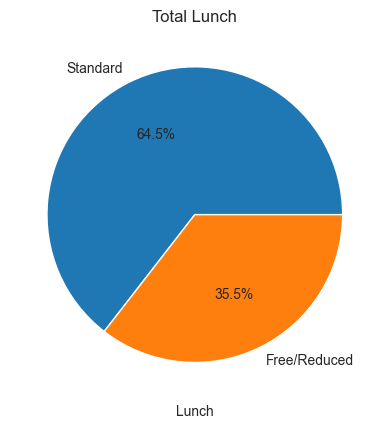

In [18]:
plt.pie(lunch, autopct='%1.1f%%', labels=lunch.index)
plt.title('Total Lunch')
plt.xlabel('Lunch')
plt.show()

## Lunch affects student performance

In [19]:
lunch_score = data.groupby('Lunch')[['Math_Score','Reading_Score','Writing_Score']].mean().round()
lunch_score

,Math_Score,Reading_Score,Writing_Score
Lunch,,,
Free/Reduced,59.0,65.0,63.0
Standard,70.0,72.0,71.0


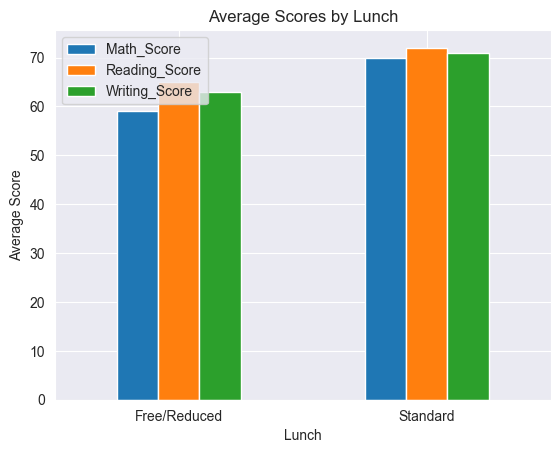

In [20]:
lunch_score.plot(kind='bar')
plt.title('Average Scores by Lunch')
plt.xlabel('Lunch')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

## How many of them prepared for test

In [21]:
test = data['Test_Preparation'].value_counts()
test

Test_Preparation
Not Completed    642
Completed        358
Name: count, dtype: int64

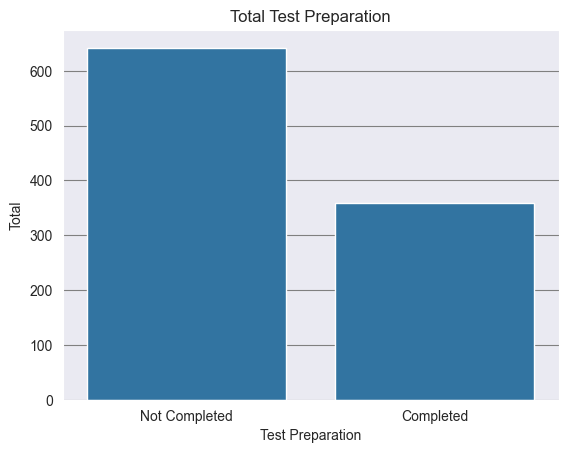

In [22]:
sns.barplot(x=test.index, y=test.values)
plt.title('Total Test Preparation')
plt.xlabel('Test Preparation')
plt.ylabel('Total')
plt.grid(True, axis='y', color='grey')
plt.show()

## Scores

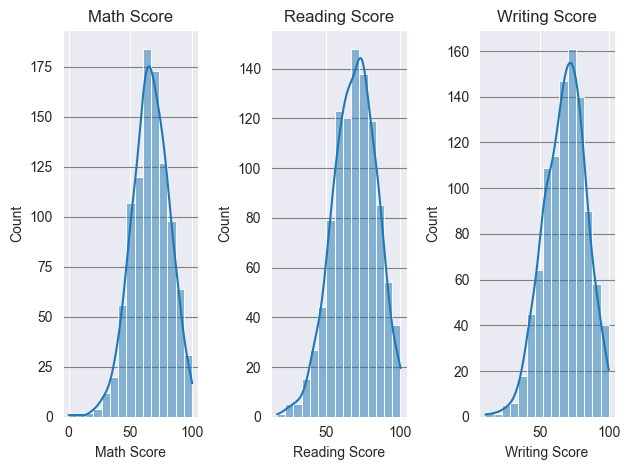

In [23]:
plt.subplot(1,3,1)
sns.histplot(data=data, x='Math_Score', bins=15, kde=True)
plt.title('Math Score')
plt.xlabel('Math Score')
plt.grid(True, axis='y', color='grey')

plt.subplot(1,3,2)
sns.histplot(data=data, x='Reading_Score', bins=15, kde=True)
plt.title('Reading Score')
plt.xlabel('Reading Score')
plt.grid(True, axis='y', color='grey')

plt.subplot(1,3,3)
sns.histplot(data=data, x='Writing_Score', bins=15, kde=True)
plt.title('Writing Score')
plt.xlabel('Writing Score')
plt.grid(True, axis='y', color='grey')

plt.tight_layout()

## Scores by preparation

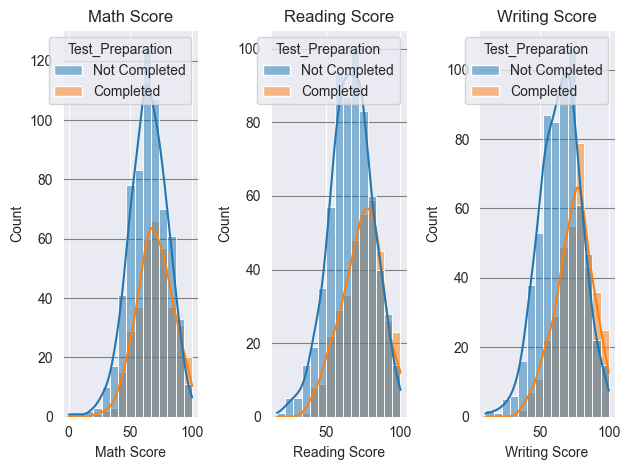

In [24]:
plt.subplot(1,3,1)
sns.histplot(data=data, x='Math_Score', hue='Test_Preparation', bins=15, kde=True)
plt.title('Math Score')
plt.xlabel('Math Score')
plt.grid(True, axis='y', color='grey')

plt.subplot(1,3,2)
sns.histplot(data=data, x='Reading_Score', hue='Test_Preparation', bins=15, kde=True)
plt.title('Reading Score')
plt.xlabel('Reading Score')
plt.grid(True, axis='y', color='grey')

plt.subplot(1,3,3)
sns.histplot(data=data, x='Writing_Score', hue='Test_Preparation', bins=15, kde=True)
plt.title('Writing Score')
plt.xlabel('Writing Score')
plt.grid(True, axis='y', color='grey')

plt.tight_layout()

## Top Scores

In [25]:
top_math = data['Math_Score'][data['Math_Score'] > 95].value_counts()
top_read = data['Reading_Score'][data['Reading_Score'] > 95].value_counts()
top_write = data['Writing_Score'][data['Writing_Score'] > 95].value_counts()

df_tops = pd.DataFrame({
    'Math Score':top_math,
    'Reading Score':top_read,
    'Writing Score':top_write
})

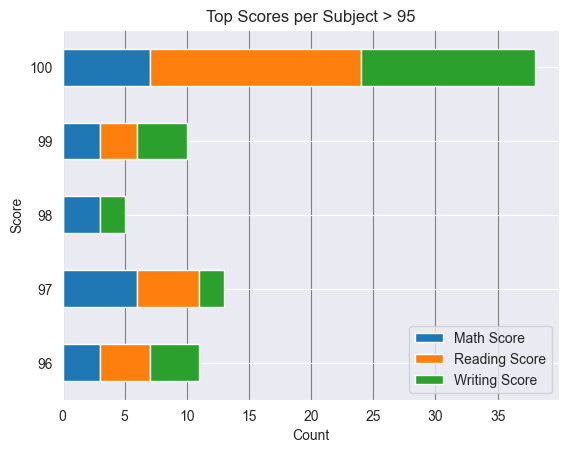

In [26]:
df_tops.plot(kind='barh',stacked=True)
plt.title('Top Scores per Subject > 95')
plt.xlabel('Count')
plt.ylabel('Score')
plt.grid(True, axis='x', color='grey')
plt.show()

## Violin Plot distributions

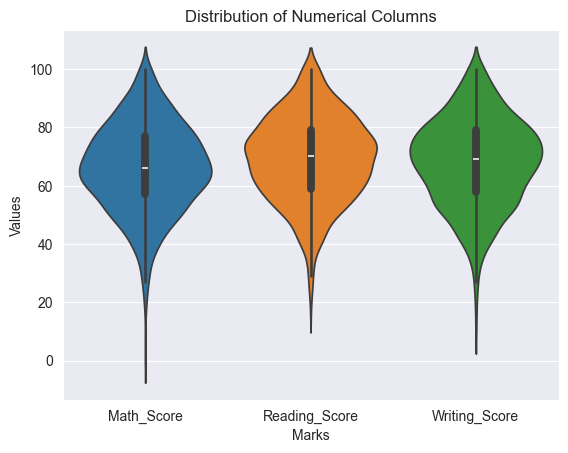

In [27]:
sns.violinplot(data=data.select_dtypes(include='number'))
plt.title('Distribution of Numerical Columns')
plt.xlabel('Marks')
plt.ylabel('Values')
plt.show()

## Boxplot to see outliers

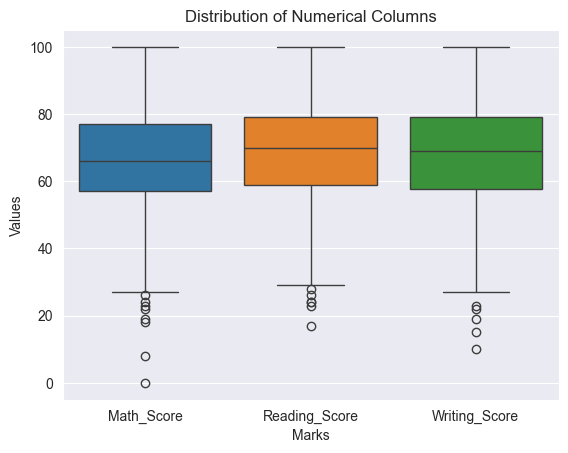

In [28]:
sns.boxplot(data=data)
plt.title('Distribution of Numerical Columns')
plt.xlabel('Marks')
plt.ylabel('Values')
plt.show()

## Average Score by Test Preparation

In [29]:
avg_test = data.groupby('Test_Preparation')[['Math_Score','Reading_Score','Writing_Score']].mean()

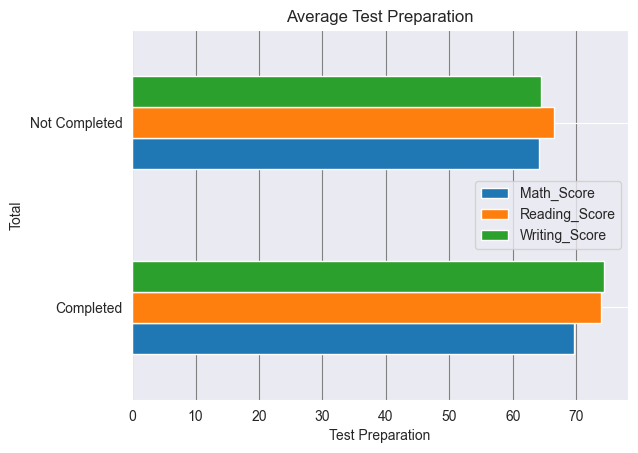

In [30]:
avg_test.plot(kind='barh')
plt.title('Average Test Preparation')
plt.xlabel('Test Preparation')
plt.ylabel('Total')
plt.grid(True, axis='x', color='grey')
plt.show()

## Average scores by Gender

In [31]:
avg_gender = data.groupby('Gender')[['Math_Score','Reading_Score','Writing_Score']].mean()

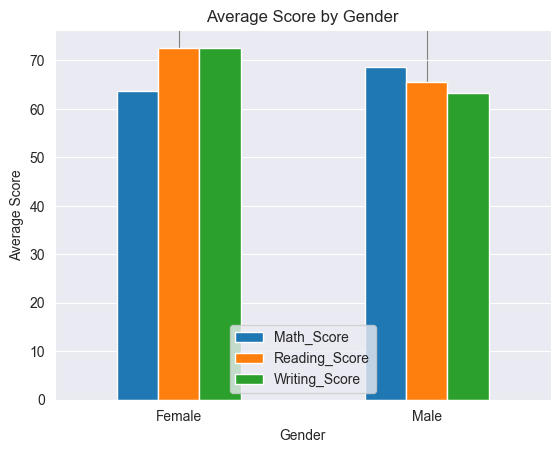

In [32]:
avg_gender.plot(kind='bar')
plt.title('Average Score by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Average Score')
plt.grid(True, axis='x', color='grey')
plt.show()